In [2]:
import numpy as np, pandas as pd, math
import matplotlib.pyplot as plt

## 3.3

In [481]:
data3 = pd.read_csv('./data3.csv')
data3_alpha = data3.get(['密度', '含糖率', '好瓜'])
data3_alpha['好瓜'] = data3_alpha['好瓜'].apply(lambda x: 1 if x == '是' else 0)
data3_alpha.head()

feature, label = data3_alpha.get(['密度', '含糖率']), data3_alpha['好瓜']
feature, label = feature.values, label.values
feature = np.c_[feature, np.ones(len(feature))]

/home/impulse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [487]:
def gauss(x, y, sigma = 0.15):
    z = np.square(x - y)
    if len(z.shape) > 1: z = z.sum(axis = 1)
    else: z = z.sum()
    t = -z / float(2.0 * sigma * sigma)
    return np.exp(t)

In [465]:
def deriv(feature, label, beta, lamda = 0.1, ker = True, kappa = None):
    m = feature.shape[1]
    n = feature.shape[0]
    ret = np.zeros(m)
    if ker == True:
        ret = np.zeros(n)
    
    if ker == False:
        for i in range(n):
            y = np.exp(np.dot(beta, feature[i]))
            p1 = float(y) / float(1 + y)
            ret -= feature[i] * (label[i] - p1)
        ret += 2 * lamda * beta ## l2 正则
    else:
        for j in range(n):
            for i in range(n):
                y = np.exp(np.dot(beta, kappa[i]))
                p1 = float(y) / float(1 + y)
                ret[j] -= kappa[i, j] * (label[i] - p1)
    return ret

In [466]:
def LR(feature, label, kappa = None, ker = True, beta = np.ones(3), step = 1.0, output = 0):
    n = feature.shape[0]
    m, i = feature.shape[1], 0
    
    beta, last = np.ones(m), np.zeros(m)
    if ker == True:
        beta, last = np.ones(n), np.zeros(n)
        
    while np.sum(np.square(last - beta)) > 1e-3:
        i = i + 1
        if output and (i < 10 or i % 100 == 0):
            print (i, beta)
        last = beta
        beta = beta - deriv(feature, label, beta, 0.1, ker, kappa) * step / i
    return beta

In [467]:
def plotBestFit(beta, feature, label):
    xcord1, ycord1 = [],  []
    xcord2, ycord2 = [],  []
    for i in range(len(feature)):
        if int(label[i]) == 1:
            xcord1.append(feature[i, 0]); ycord1.append(feature[i, 1])
        else:
            xcord2.append(feature[i, 0]); ycord2.append(feature[i, 1])
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker='s')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(0, 1, 0.1)
    y = (-beta[2] - beta[0] * x) / beta[1] ## w1*x1 + w2*x2 + b = 0
    ax.plot(x, y)
    plt.xlabel("X1"); plt.ylabel("X2")
    plt.show()

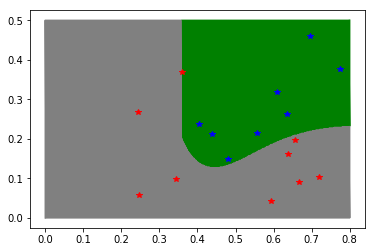

In [492]:
xv, yv = np.meshgrid(np.linspace(0, 0.8, 300), np.linspace(0, 0.5, 300), sparse=False, indexing='ij')
test_posi = []
test_nega = []
for i in range(len(xv)):
    for j in range(len(yv)):
        cur = np.array([xv[i,j], yv[i,j], 1.0]) + 1e-8 * np.ones(3)
        kappa = np.zeros(n)
        for k in range(n): 
            kappa[k] = gauss(feature[k], cur)
        predict = np.dot(kappa, beta)
        if predict >= 0:
            test_posi.append([cur[0], cur[1]])
        else:
            test_nega.append([cur[0], cur[1]])
            
test_posi = np.array(test_posi)
test_nega = np.array(test_nega)

plt.plot(test_posi[:,0], test_posi[:,1], color = 'green')
plt.plot(test_nega[:,0], test_nega[:,1], color = 'gray')

plt.plot(feature[np.where(label==0),0], feature[np.where(label==0),1], marker='*', color = 'red')
plt.plot(feature[np.where(label==1),0], feature[np.where(label==1),1], marker='*', color = 'blue')

1 4.9082791077003645
1 4.1800782507620236
1 2.5605216751630087
1 4.273774763551626
1 1.6058232767691996
1 1.180683434983101
1 0.3589033326822968
1 1.4540603960989826
0 -4.205609313485477
0 -1.6554451012041813
0 -2.016665971956054
0 -1.1374089007199042
0 -1.7742586990278086
0 -0.5059720515154273
0 0.30718012425436086
0 -3.6744369597491406
0 -4.180631150138382

 0.9411764705882353


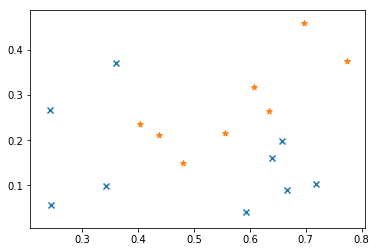

In [488]:
n = len(feature)
kappa = np.zeros((n, n))
for i in range(n): 
    for j in range(n): 
        kappa[i, j] = gauss(feature[i], feature[j])
        
beta = LR(feature, label, kappa, True)

if len(beta) > 3:
    for i in range(n):
        print(label[i], np.dot(beta, kappa[i]))
    acc = [ 1 if (x > 0 and y == 1) or (x <= 0 and y == 0) else 0 for x, y in zip(np.dot(kappa, beta), label) ]
else:
    for i in range(n):
        print(label[i], np.dot(beta, feature[i]))
    acc = [ 1 if (x > 0 and y == 1) or (x <= 0 and y == 0) else 0 for x, y in zip(np.dot(feature, beta), label) ]

print ('\n', sum(acc) / len(acc))


plt.scatter(feature[np.where(label==0),0], feature[np.where(label==0),1], marker='x')
plt.scatter(feature[np.where(label==1),0], feature[np.where(label==1),1], marker='*')
# plotBestFit(beta, feature, label)

## 3.4

In [683]:
data_iris = pd.read_csv('./data_iris.csv', names=['sepal_l', 'sepal_w', 'petal_l', 'petal_w', 'type'])

In [684]:
def idxing(x):
    if x == 'Iris-setosa':
        return 0
    elif x == 'Iris-versicolor':
        return 1
    else:
        return 2
data_iris['type'] = data_iris['type'].apply(idxing)

In [687]:
def data_from_idx(data, idx):
    data = data[data['type'] != (idx + 2) % 3]
    data['type'] = data['type'].apply(lambda x: 0 if x == idx else 1)    
    return data

In [755]:
def ten_fold(df):
    
    fold = 10
    data = data_from_idx(df, 0)
    data = data.values
    
    correct_num = 0

    for T in range(10):
        np.random.shuffle(data)

        feature = data[:,:-1]
        label = data[:,-1]
        feature = np.c_[feature, np.ones(len(data))]

        for i in range(fold):
            index_test = np.arange(i, len(data), fold)
            index_train = np.array(list(set(range(100)).difference(index_test)))

            feature_train = feature[index_train]
            label_train = label[index_train]

            feature_test = feature[index_test]
            label_test = label[index_test]
            predict_label_test = np.zeros(len(label_test))

            beta = LR(feature_train, label_train)
            for i in range(len(label_test)):
                t = 1 if np.dot(beta, feature_test[i]) >= 0 else 0
                predict_label_test[i] = t

#             print(predict_label_test)
#             print(label_test)
            correct_num += np.sum(predict_label_test == label_test)
    
    print ('accuracy is {}%'.format(correct_num / float(10)))
    
    return 

In [756]:
ten_fold(data_iris)

/home/impulse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


accuracy is 89.8%


In [764]:
def n_fold(df):
    
    data = data_from_idx(df, 0)
    data = data.values
    fold = len(data)
    
    correct_num = 0

    np.random.shuffle(data)

    feature = data[:,:-1]
    label = data[:,-1]
    feature = np.c_[feature, np.ones(len(data))]

    for i in range(fold):
        print ('i = {}'.format(i))
        index_test = np.arange(i, len(data), fold)
        index_train = np.array(list(set(range(100)).difference(index_test)))

        feature_train = feature[index_train]
        label_train = label[index_train]

        feature_test = feature[index_test]
        label_test = label[index_test]
        predict_label_test = np.zeros(len(label_test))

        beta = LR(feature_train, label_train)
        for i in range(len(label_test)):
            t = 1 if np.dot(beta, feature_test[i]) >= 0 else 0
            predict_label_test[i] = t

#             print(predict_label_test)
#             print(label_test)
        correct_num += np.sum(predict_label_test == label_test)
    
    print ('accuracy is {}%'.format(correct_num))
    
    return 

In [765]:
n_fold(data_iris)

/home/impulse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
i = 10
i = 11
i = 12
i = 13
i = 14
i = 15
i = 16
i = 17
i = 18
i = 19
i = 20
i = 21
i = 22
i = 23
i = 24
i = 25
i = 26
i = 27
i = 28
i = 29
i = 30
i = 31
i = 32
i = 33
i = 34
i = 35
i = 36
i = 37
i = 38
i = 39
i = 40
i = 41
i = 42
i = 43
i = 44
i = 45
i = 46
i = 47
i = 48
i = 49
i = 50
i = 51
i = 52
i = 53
i = 54
i = 55
i = 56
i = 57
i = 58
i = 59
i = 60
i = 61
i = 62
i = 63
i = 64
i = 65
i = 66
i = 67
i = 68
i = 69
i = 70
i = 71
i = 72
i = 73
i = 74
i = 75
i = 76
i = 77
i = 78
i = 79
i = 80
i = 81
i = 82
i = 83
i = 84
i = 85
i = 86
i = 87
i = 88
i = 89
i = 90
i = 91
i = 92
i = 93
i = 94
i = 95
i = 96
i = 97
i = 98
i = 99
accuracy is 100%


## 3.5

In [883]:
data3 = pd.read_csv('./data3.csv')
data3_alpha = data3.get(['密度', '含糖率', '好瓜'])
data3_alpha['好瓜'] = data3_alpha['好瓜'].apply(lambda x: 1 if x == '是' else 0)
data3_alpha.head()

feature, label = data3_alpha.get(['密度', '含糖率']), data3_alpha['好瓜']
feature, label = feature.values, label.values

/home/impulse/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [802]:
def Devi(data): # 样本离差阵
    bar = np.mean(data)
    data -= bar
    return np.dot(data.T, data)

In [916]:
def LDA(feature, label):
    feature_1 = feature[label == 1]
    feature_0 = feature[label == 0]
    
    bar_1 = np.apply_along_axis(arr=feature_1, axis=0, func1d=np.mean)
    bar_0 = np.apply_along_axis(arr=feature_0, axis=0, func1d=np.mean)
#     Sb = np.dot(bar_0, bar_1.T)
    S0, S1 = Devi(feature_0), Devi(feature_1)
    Sw = S0 + S1
    U, S, VT = np.linalg.svd(Sw)
    
    end = 0
    for i in range(len(S) + 1):
        if S[:end].sum() / float(S.sum()) <= 0.99:
            end = i
            
    w = np.linalg.multi_dot([VT.T[:,:end], np.linalg.inv(np.diag(S[:end])), U[:end,:], bar_0 - bar_1])
    return w

In [917]:
w = LDA(feature, label)

In [918]:
def plotDisCriminant(w, feature, label):
    xcord1, ycord1 = feature[label == 0, 0], feature[label == 0, 1]
    xcord2, ycord2 = feature[label == 1, 0], feature[label == 1, 1]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(xcord1, ycord1, s = 30, c = 'red', marker='s')
    ax.scatter(xcord2, ycord2, s = 30, c = 'green')
    x = np.arange(0, 1, 0.1)
    y = 1.0 * w[1] / w[0] * x
    ax.plot(x, y)
    plt.xlabel("X1"); plt.ylabel("X2")
    plt.show()

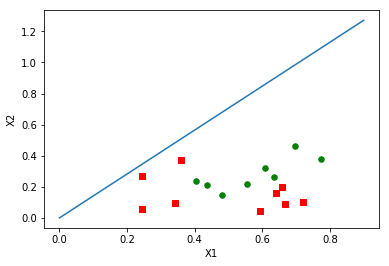

In [919]:
plotDisCriminant(w, feature, label)

## More

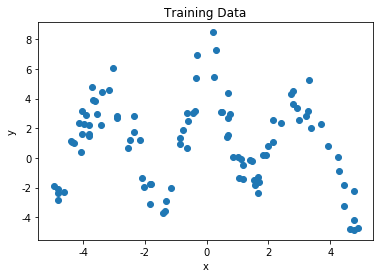

In [332]:
% matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.linear_model
import sklearn.kernel_ridge
import sklearn.metrics.pairwise

def plot_model(X_test, clf):
    '''
    Note: uses globals x, y, x_test, which are assigned below
    when the dataset is created. Don't overwrite these variables.
    '''
    y_test = clf.predict(X_test)
    plt.scatter(x_train, y_train)
    plt.plot(x_test, y_test)
    plt.legend(['Test', 'Train'])
    
# Set random seed
np.random.seed(0)

# Create random set of m training x values between -5 and 5
m = 100
x_train = np.random.rand(m)*10 - 5   

# Create evenly spaced test x values (for plotting)
x_test  = np.linspace(-5, 5, 100)
m_test  = len(x_test);

def f(x):
    return 0.1*(x + x**2 + 10*x + 0.5*x**2 - 0.5*x**3)*x

def f(x):
    return 0.5*np.cos(x) + np.sin(x) + 4*np.cos(2*x) + np.exp(np.cos(3*x))


y_train = f(x_train) + np.random.randn(m)   # polynomial plus noise

x_train = x_train.reshape(-1, 1)
x_test  = x_test.reshape(-1, 1)

# Plot the training data
plt.scatter(x_train, y_train)
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

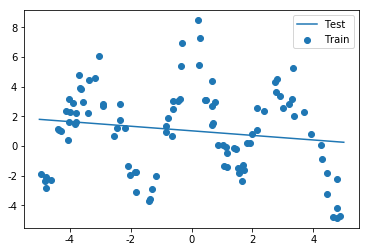

In [340]:
clf = sklearn.linear_model.LinearRegression()
clf.fit(x_train, y_train)
plot_model(x_test, clf)

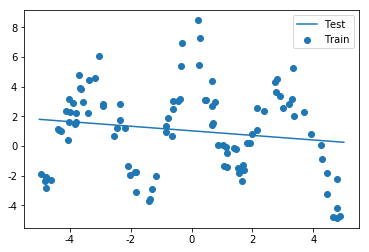

In [387]:
def linear_kernel(X, Z):
    '''
    Compute dot product between each row of X and each row of Z
    '''
    m1,_ = X.shape
    m2,_ = Z.shape
    K = np.zeros((m1, m2))
    for i in range(m1):
        for j in range(m2):
            K[i,j] = np.dot(X[i,:], Z[j,:])
    
    return K


K_train = linear_kernel(x_train, x_train) + 1e-8 * np.eye(m)  # see note below
K_test  = linear_kernel(x_test,  x_train)
m = K_train.shape[0]

clf = sklearn.linear_model.LinearRegression()
clf.fit(K_train, y_train)
plot_model(K_test, clf)

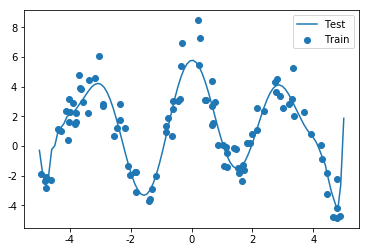

In [389]:
# Explicit definition
def polynomial_kernel(X, Z, d):
    '''
    Compute dot product between each row of X and each row of Z
    '''
    m1,_ = X.shape
    m2,_ = Z.shape
    K = np.zeros((m1, m2))
    for i in range(m1):
        for j in range(m2):
            K[i,j] = (np.dot(X[i,:], Z[j,:]) + 1)**d
            
    return K

K_train = polynomial_kernel(x_train, x_train, 12) + 1e-8 * np.eye(m)  # see note below
K_test  = polynomial_kernel(x_test,  x_train, 12)
m = K_train.shape[0]

clf = sklearn.linear_model.LinearRegression()
clf.fit(K_train, y_train)
plot_model(K_test, clf)